<a href="https://colab.research.google.com/github/arijitar/Machine-Learning/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import numpy as np
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
X,y = make_moons(100,noise=0.25, random_state=2)

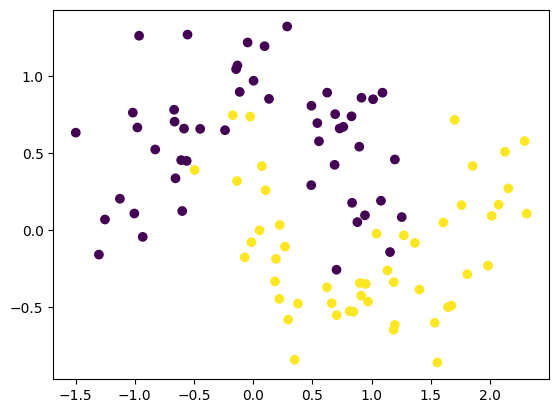

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
model1 = Sequential()
model1.add(Dense(128,input_dim=2,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history = model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=2)

Epoch 1/2000
3/3 - 3s - 1s/step - accuracy: 0.5625 - loss: 0.6012 - val_accuracy: 0.9000 - val_loss: 0.3623
Epoch 2/2000
3/3 - 0s - 123ms/step - accuracy: 0.8125 - loss: 0.4371 - val_accuracy: 0.9000 - val_loss: 0.2236
Epoch 3/2000
3/3 - 0s - 18ms/step - accuracy: 0.8500 - loss: 0.3789 - val_accuracy: 0.8500 - val_loss: 0.1833
Epoch 4/2000
3/3 - 0s - 19ms/step - accuracy: 0.8250 - loss: 0.3751 - val_accuracy: 0.9000 - val_loss: 0.2374
Epoch 5/2000
3/3 - 0s - 13ms/step - accuracy: 0.8500 - loss: 0.3702 - val_accuracy: 0.9000 - val_loss: 0.2730
Epoch 6/2000
3/3 - 0s - 18ms/step - accuracy: 0.8250 - loss: 0.3731 - val_accuracy: 0.9000 - val_loss: 0.2483
Epoch 7/2000
3/3 - 0s - 13ms/step - accuracy: 0.8375 - loss: 0.3515 - val_accuracy: 0.9000 - val_loss: 0.2613
Epoch 8/2000
3/3 - 0s - 19ms/step - accuracy: 0.8500 - loss: 0.3437 - val_accuracy: 0.9000 - val_loss: 0.2102
Epoch 9/2000
3/3 - 0s - 13ms/step - accuracy: 0.8500 - loss: 0.3197 - val_accuracy: 0.9000 - val_loss: 0.2088
Epoch 10/20

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


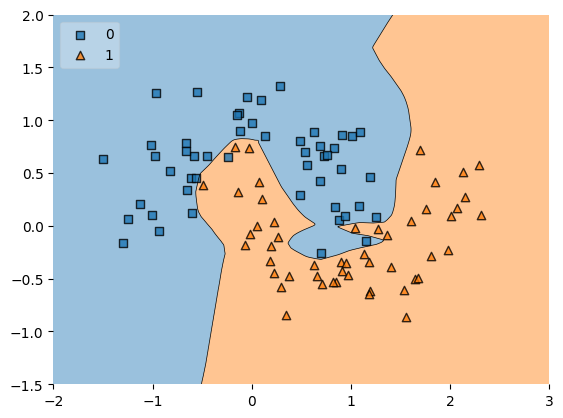

In [6]:
plot_decision_regions(X,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

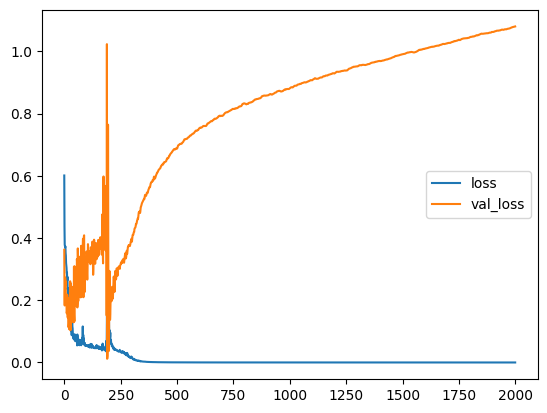

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [8]:
model = Sequential()
model.add(Dense(128,input_dim=2,activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03))) # Changed 'kernal_regularizer' to 'kernel_regularizer'
model.add(Dense(128,activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03))) # Changed 'kernal_regularizer' to 'kernel_regularizer'
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history = model.fit(X,y,epochs=2000,validation_split=0.2,verbose=2)

Epoch 1/2000
3/3 - 3s - 948ms/step - accuracy: 0.7500 - loss: 4.0565 - val_accuracy: 0.9000 - val_loss: 2.6908
Epoch 2/2000
3/3 - 1s - 204ms/step - accuracy: 0.8125 - loss: 2.3365 - val_accuracy: 0.9000 - val_loss: 1.4768
Epoch 3/2000
3/3 - 0s - 16ms/step - accuracy: 0.8375 - loss: 1.3448 - val_accuracy: 0.9000 - val_loss: 0.8253
Epoch 4/2000
3/3 - 0s - 13ms/step - accuracy: 0.8000 - loss: 0.8470 - val_accuracy: 0.9000 - val_loss: 0.5803
Epoch 5/2000
3/3 - 0s - 20ms/step - accuracy: 0.8375 - loss: 0.6549 - val_accuracy: 0.9000 - val_loss: 0.5522
Epoch 6/2000
3/3 - 0s - 14ms/step - accuracy: 0.8500 - loss: 0.6196 - val_accuracy: 0.9000 - val_loss: 0.4998
Epoch 7/2000
3/3 - 0s - 20ms/step - accuracy: 0.8125 - loss: 0.6424 - val_accuracy: 0.9000 - val_loss: 0.5055
Epoch 8/2000
3/3 - 0s - 20ms/step - accuracy: 0.8375 - loss: 0.6388 - val_accuracy: 0.9000 - val_loss: 0.5504
Epoch 9/2000
3/3 - 0s - 18ms/step - accuracy: 0.8000 - loss: 0.6350 - val_accuracy: 0.9000 - val_loss: 0.5601
Epoch 10

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


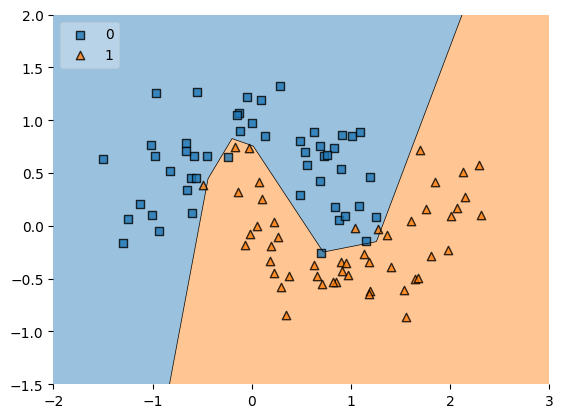

In [10]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

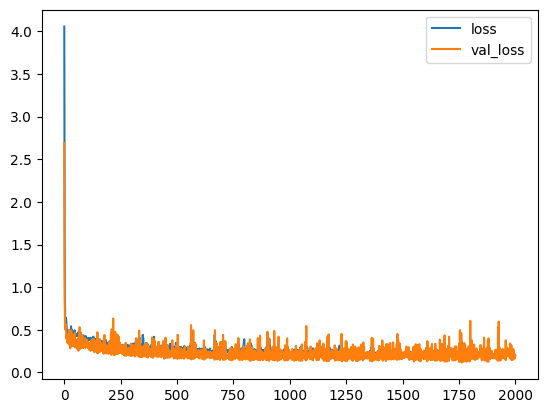

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [12]:
model1_get_weights = model1.get_weights()[0].reshape(256)
model_get_weights = model.get_weights()[0].reshape(256)

<Axes: >

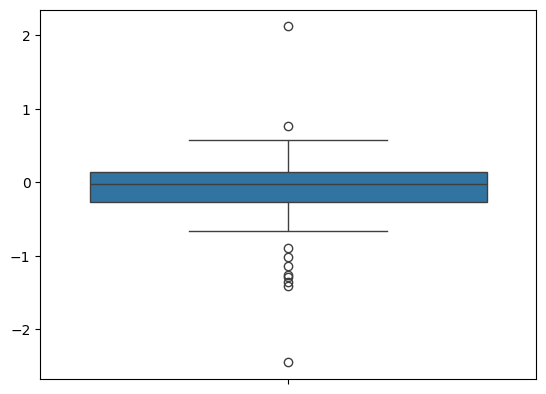

In [13]:
sns.boxplot(model1_get_weights)

<Axes: >

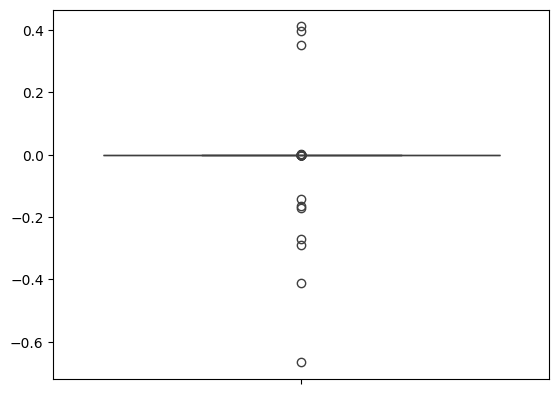

In [14]:
sns.boxplot(model_get_weights)